In [ ]:
import time
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns 
import re
import string
import nltk 
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
from textblob import TextBlob
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import pickle

In [ ]:
train2=pd.read_csv('train1_data.csv')

In [ ]:
train1=pd.read_csv("train4_data.csv")

In [ ]:
train=pd.concat([train2,train1])

In [ ]:
train_text=train


In [ ]:
train_text.head()

,Unnamed: 0,0
0,0,Data Nerds!! Do you use the Morning Brew for y...
1,1,Has anyone picked up “Storytelling With Data: ...
2,2,That was the best sponsorship video section i ...
3,3,Love all the 5 steps you laid out. I recently ...
4,4,Morning brew asking for lot of unnecessary det...


In [ ]:
train_text.shape

(6146, 2)

In [ ]:
train_text.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6146 entries, 0 to 4129
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6146 non-null   object
 1   0           6054 non-null   object
dtypes: object(2)
memory usage: 144.0+ KB


In [ ]:
train_text=train_text.drop('Unnamed: 0',axis=1)

In [ ]:
train_text.head()

,0
0,Data Nerds!! Do you use the Morning Brew for y...
1,Has anyone picked up “Storytelling With Data: ...
2,That was the best sponsorship video section i ...
3,Love all the 5 steps you laid out. I recently ...
4,Morning brew asking for lot of unnecessary det...


In [ ]:
train_text.rename(columns={'0':'Text'}, inplace= True)

In [ ]:
train_text.head()

,Text
0,Data Nerds!! Do you use the Morning Brew for y...
1,Has anyone picked up “Storytelling With Data: ...
2,That was the best sponsorship video section i ...
3,Love all the 5 steps you laid out. I recently ...
4,Morning brew asking for lot of unnecessary det...


In [ ]:
total=train_text.isnull().sum().sort_values(ascending=False)

percent=train_text.isnull().sum()/train_text.isnull().count()

missing_data=pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data

,Total,Percent
Text,92,0.014969


In [ ]:
train_text['Text'].mode().iloc[0]

'Good'

In [ ]:
train_text=train_text.dropna()

In [ ]:
total=train_text.isnull().sum().sort_values(ascending=False)

percent=train_text.isnull().sum()/train_text.isnull().count()

missing_data=pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data

,Total,Percent
Text,0,0.0


In [ ]:
train_text.shape

(6054, 1)

In [ ]:
train_text.head()

,Text
0,Data Nerds!! Do you use the Morning Brew for y...
1,Has anyone picked up “Storytelling With Data: ...
2,That was the best sponsorship video section i ...
3,Love all the 5 steps you laid out. I recently ...
4,Morning brew asking for lot of unnecessary det...


In [ ]:
train_text.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6054 entries, 0 to 4129
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    6054 non-null   object
dtypes: object(1)
memory usage: 94.6+ KB


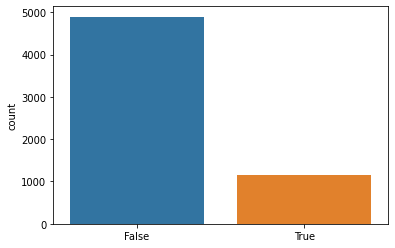

In [ ]:
sns.countplot(train_text.duplicated())

In [ ]:
train_text.value_counts()

Text                                                                                                                                                                                                         
Good                                                                                                                                                                                                             9
<a href="https://youtu.be/j8q8zY703l0">https://youtu.be/j8q8zY703l0</a>                                                                                                                                          8
Thank you                                                                                                                                                                                                        6
great                                                                                                                                                            

In [ ]:
train_text=train_text.drop_duplicates()

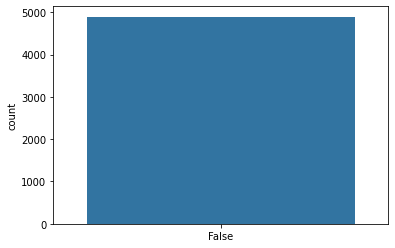

In [ ]:
sns.countplot(train_text.duplicated())

In [ ]:
train_text.reset_index(drop=True, inplace = True)


In [ ]:
train_text

,Text
0,Data Nerds!! Do you use the Morning Brew for y...
1,Has anyone picked up “Storytelling With Data: ...
2,That was the best sponsorship video section i ...
3,Love all the 5 steps you laid out. I recently ...
4,Morning brew asking for lot of unnecessary det...
...,...
4888,"Leftist Democrats: To all you uniting workers,..."
4889,If the Canadian government shuts down the prot...
4890,they supported farmers in India blockading New...
4891,If you get sick do you call a trucker or a med...


In [ ]:
def sentiment_analysis(train_text):
 def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity
  
 #Create a function to get the polarity
 def getPolarity(text):
   return TextBlob(text).sentiment.polarity
  
 #Create two new columns ‘Subjectivity’ & ‘Polarity’
 train_text['TextBlob_Subjectivity'] =train_text['Text'].apply(getSubjectivity)
 train_text['TextBlob_Polarity'] = train_text['Text'].apply(getPolarity)
 def getAnalysis(score):
  if score < -0.1:
    return "Negative"
  elif score <=0.1 and score >=-0.1 :
    return "Neutral"
  elif score >0.1:
    return "Positive"
 train_text ['TextBlob_Analysis'] = train_text  ['TextBlob_Polarity'].apply(getAnalysis )
 return train_text

In [ ]:
sentiment_analysis(train_text)

,Text,TextBlob_Subjectivity,TextBlob_Polarity,TextBlob_Analysis
0,Data Nerds!! Do you use the Morning Brew for y...,0.800000,0.400000,Positive
1,Has anyone picked up “Storytelling With Data: ...,0.100000,0.300000,Positive
2,That was the best sponsorship video section i ...,0.650000,0.800000,Positive
3,Love all the 5 steps you laid out. I recently ...,0.462500,0.281250,Positive
4,Morning brew asking for lot of unnecessary det...,0.700000,-0.200000,Negative
...,...,...,...,...
4888,"Leftist Democrats: To all you uniting workers,...",0.583889,-0.020556,Neutral
4889,If the Canadian government shuts down the prot...,0.644444,0.072222,Neutral
4890,they supported farmers in India blockading New...,0.527273,-0.031818,Neutral
4891,If you get sick do you call a trucker or a med...,0.319048,-0.204762,Negative


In [ ]:
#train=train.drop('index',axis=1)

# New Section

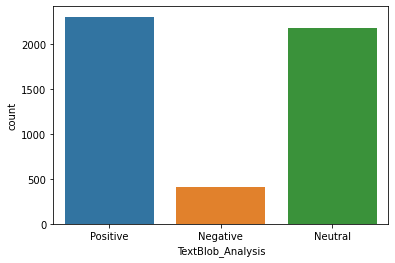

In [ ]:
sns.countplot(train_text['TextBlob_Analysis'])

In [ ]:
def clean_data(comment):
  comment=comment.replace('[^a-z A-Z]','',inplace=False,regex=True)
  comment=comment.astype(str).str.lower()
  comment=comment.replace('https?://\S+|www\.\S+', '',inplace=False,regex=True)
  return comment


In [ ]:
train_text['Text']=clean_data(train_text['Text'])

In [ ]:
train_text['Text']

0       data nerds do you use the morning brew for you...
1       has anyone picked up storytelling with data le...
2       that was the best sponsorship video section i ...
3       love all the  steps you laid out i recently ha...
4       morning brew asking for lot of unnecessary det...
                              ...                        
4888    leftist democrats to all you uniting workers w...
4889    if the canadian government shuts down the prot...
4890    they supported farmers in india blockading new...
4891    if you get sick do you call a trucker or a med...
4892    this is an attack on canadian democracy funded...
Name: Text, Length: 4893, dtype: object

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('words')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [ ]:
from nltk.tokenize import word_tokenize
token=train_text['Text'].apply(lambda x:word_tokenize(x))

In [ ]:
token

0       [data, nerds, do, you, use, the, morning, brew...
1       [has, anyone, picked, up, storytelling, with, ...
2       [that, was, the, best, sponsorship, video, sec...
3       [love, all, the, steps, you, laid, out, i, rec...
4       [morning, brew, asking, for, lot, of, unnecess...
                              ...                        
4888    [leftist, democrats, to, all, you, uniting, wo...
4889    [if, the, canadian, government, shuts, down, t...
4890    [they, supported, farmers, in, india, blockadi...
4891    [if, you, get, sick, do, you, call, a, trucker...
4892    [this, is, an, attack, on, canadian, democracy...
Name: Text, Length: 4893, dtype: object

In [ ]:
token.apply(lambda y:print("Old length: ", len(y))).head()

Old length:  17
Old length:  22
Old length:  12
Old length:  34
Old length:  47
Old length:  1
Old length:  11
Old length:  12
Old length:  52
Old length:  12
Old length:  2
Old length:  6
Old length:  33
Old length:  3
Old length:  82
Old length:  18
Old length:  2
Old length:  41
Old length:  6
Old length:  6
Old length:  56
Old length:  16
Old length:  11
Old length:  95
Old length:  22
Old length:  51
Old length:  6
Old length:  12
Old length:  14
Old length:  19
Old length:  1
Old length:  16
Old length:  7
Old length:  44
Old length:  24
Old length:  144
Old length:  13
Old length:  20
Old length:  18
Old length:  93
Old length:  63
Old length:  129
Old length:  28
Old length:  5
Old length:  79
Old length:  15
Old length:  57
Old length:  21
Old length:  107
Old length:  8
Old length:  9
Old length:  1
Old length:  28
Old length:  28
Old length:  12
Old length:  37
Old length:  25
Old length:  31
Old length:  21
Old length:  42
Old length:  2
Old length:  16
Old length:  21
Old 

0    None
1    None
2    None
3    None
4    None
Name: Text, dtype: object

In [ ]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
skilearn=ENGLISH_STOP_WORDS

token=token.apply(lambda x:[word for word in x if word not in skilearn])


In [ ]:
token.apply(lambda z:print("Old length: ", len(z)))

Old length:  9
Old length:  8
Old length:  6
Old length:  16
Old length:  22
Old length:  1
Old length:  5
Old length:  7
Old length:  26
Old length:  6
Old length:  1
Old length:  4
Old length:  13
Old length:  1
Old length:  32
Old length:  11
Old length:  2
Old length:  19
Old length:  4
Old length:  4
Old length:  32
Old length:  10
Old length:  6
Old length:  49
Old length:  12
Old length:  28
Old length:  4
Old length:  7
Old length:  3
Old length:  11
Old length:  1
Old length:  8
Old length:  3
Old length:  24
Old length:  9
Old length:  57
Old length:  6
Old length:  10
Old length:  9
Old length:  48
Old length:  28
Old length:  67
Old length:  13
Old length:  3
Old length:  30
Old length:  6
Old length:  33
Old length:  12
Old length:  47
Old length:  5
Old length:  4
Old length:  1
Old length:  20
Old length:  21
Old length:  8
Old length:  15
Old length:  12
Old length:  19
Old length:  13
Old length:  16
Old length:  2
Old length:  6
Old length:  11
Old length:  39
Old len

0       None
1       None
2       None
3       None
4       None
        ... 
4888    None
4889    None
4890    None
4891    None
4892    None
Name: Text, Length: 4893, dtype: object

In [ ]:
token

0       [data, nerds, use, morning, brew, news, brsign...
1       [picked, storytelling, data, lets, practice, w...
2         [best, sponsorship, video, section, seen, nice]
3       [love, steps, laid, recently, interview, appli...
4       [morning, brew, asking, lot, unnecessary, deta...
                              ...                        
4888    [leftist, democrats, uniting, workers, brutall...
4889    [canadian, government, shuts, protests, trucke...
4890    [supported, farmers, india, blockading, new, d...
4891               [sick, trucker, medical, professional]
4892    [attack, canadian, democracy, funded, people, ...
Name: Text, Length: 4893, dtype: object

In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatize(data):
    a=[lemmatizer.lemmatize(word) for word in data]
    return a
token=token.apply(lambda x:lemmatize(x))


In [ ]:
token

0       [data, nerd, use, morning, brew, news, brsignu...
1       [picked, storytelling, data, let, practice, wo...
2         [best, sponsorship, video, section, seen, nice]
3       [love, step, laid, recently, interview, applie...
4       [morning, brew, asking, lot, unnecessary, deta...
                              ...                        
4888    [leftist, democrat, uniting, worker, brutally,...
4889    [canadian, government, shuts, protest, trucker...
4890    [supported, farmer, india, blockading, new, de...
4891               [sick, trucker, medical, professional]
4892    [attack, canadian, democracy, funded, people, ...
Name: Text, Length: 4893, dtype: object

In [ ]:
from nltk.corpus import words
len(words.words())
engwords=words.words()

token=token.apply(lambda x:[word for word in x if word in engwords])

In [ ]:
token

0                  [data, use, morning, brew, news, free]
1       [picked, storytelling, data, let, practice, wo...
2         [best, sponsorship, video, section, seen, nice]
3       [love, step, laid, recently, interview, applie...
4       [morning, brew, lot, unnecessary, detail, quit...
                              ...                        
4888    [leftist, democrat, uniting, worker, brutally,...
4889    [government, protest, trucker, stop, supply, l...
4890                  [farmer, new, year, cry, foul, day]
4891               [sick, trucker, medical, professional]
4892       [attack, democracy, funded, people, democracy]
Name: Text, Length: 4893, dtype: object

In [ ]:
for i in range(len(token)):
    token[i] = " ".join(token[i])

In [ ]:
train_text['clean_text']=token

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train_text['TextBlob_Analysis']=le.fit_transform(train_text['TextBlob_Analysis'])

In [ ]:
train_text

,Text,TextBlob_Subjectivity,TextBlob_Polarity,TextBlob_Analysis,clean_text
0,data nerds do you use the morning brew for you...,0.800000,0.400000,2,data use morning brew news free
1,has anyone picked up storytelling with data le...,0.100000,0.300000,2,picked storytelling data let practice wonderin...
2,that was the best sponsorship video section i ...,0.650000,0.800000,2,best sponsorship video section seen nice
3,love all the steps you laid out i recently ha...,0.462500,0.281250,2,love step laid recently interview applied step...
4,morning brew asking for lot of unnecessary det...,0.700000,-0.200000,0,morning brew lot unnecessary detail quit want ...
...,...,...,...,...,...
4888,leftist democrats to all you uniting workers w...,0.583889,-0.020556,1,leftist democrat uniting worker brutally crack...
4889,if the canadian government shuts down the prot...,0.644444,0.072222,1,government protest trucker stop supply let pow...
4890,they supported farmers in india blockading new...,0.527273,-0.031818,1,farmer new year cry foul day
4891,if you get sick do you call a trucker or a med...,0.319048,-0.204762,0,sick trucker medical professional


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(train_text['clean_text'])

In [ ]:
X=bow

In [ ]:
X

<4893x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 26998 stored elements in Compressed Sparse Row format>

In [ ]:
y=train_text['TextBlob_Analysis']
y=y.replace([np.inf,-np.inf],0)
y

0       2
1       2
2       2
3       2
4       0
       ..
4888    1
4889    1
4890    1
4891    0
4892    1
Name: TextBlob_Analysis, Length: 4893, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

In [ ]:
X_train

<3914x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 21753 stored elements in Compressed Sparse Row format>

In [ ]:
X_train.shape

(3914, 1000)

In [ ]:
X_test.shape

(979, 1000)

In [ ]:
X_test

<979x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 5245 stored elements in Compressed Sparse Row format>

In [ ]:
y_train.shape

(3914,)

In [ ]:
y_test.shape

(979,)

In [ ]:

l = LogisticRegression()
l.fit(X_train,y_train)
lr=cross_val_score(l,X,y)
lr.mean()

0.7516910331689404

In [ ]:
from sklearn.tree import DecisionTreeClassifier
d = DecisionTreeClassifier()
d.fit(X_train,y_train)
dt=cross_val_score(d,X,y)
dt.mean()

0.720419818227773

In [ ]:
s=SVC()
s.fit(X_train,y_train)
svm=cross_val_score(s,X,y)
svm.mean()

0.7445381644389021

In [ ]:
k=KNeighborsClassifier()
k.fit(X_train,y_train)
knn=cross_val_score(k,X,y)
knn.mean()

0.6997827590024461

In [ ]:
from sklearn.ensemble import RandomForestClassifier
r = RandomForestClassifier()
r.fit(X_train,y_train)
#rf=cross_validate(r,X,y,return_train_score=True)
rf=cross_val_score(r,X,y)
rf.mean()

0.7512822440995046

In [ ]:
#X_test=X_test.reshape(-1,1)

In [ ]:
pred = l.predict(X_test)
pred

array([1, 2, 2, 2, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1,
       2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       2, 0, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 0, 2, 2, 0, 1, 1, 1, 1, 2, 2,
       2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1,
       2, 1, 1, 2, 1, 2, 1, 1, 2, 0, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1,
       1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2,
       1, 2, 0, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2,
       2, 2, 1, 2, 0, 2, 1, 2, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 1, 2, 2, 1,
       2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,

In [ ]:
l.score(X_test,y_test)

0.7548518896833504

In [ ]:
cm = confusion_matrix(y_test, pred)


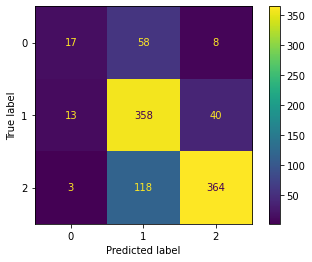

In [ ]:
plot_confusion_matrix(l,X_test,y_test)


In [ ]:
cm

array([[ 17,  58,   8],
       [ 13, 358,  40],
       [  3, 118, 364]])

In [ ]:
pickle.dump(l,open('logistic_model.pkl','wb'))

In [ ]:
predictor=pickle.load(open('logistic_model.pkl','rb'))